# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual
# Classification Code
cc = 'AG4' # AG2, AG4, AG6

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Avaiable

In [3]:
status = tta.data_available(reporter, 201912, 'HS', 'M')
print(status)
status = tta.data_available(partner, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '344', 'rDesc': 'China, Hong Kong SAR', 'ps': '201912', 'TotalRecords': 139319, 'isOriginal': 1, 'publicationDate': '2020-02-08T00:00:00', 'isPartnerDetail': 1}]


# Data

In [4]:
data_in, data_out = tta.get_import_data(reporter, partner, period, cc) 
data = tta.compare(data_in, data_out)
df = tta.prepare(data)

{'r': '699', 'p': '344', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '344', 'p': '699', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [5]:
df.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
0101,0101,"Horses, asses, mules and hinnies; live",0,Number of items,0.00,0,Number of items,0.00,0.00,0,NaN,NaN,0.00,NaN
0301,0301,Fish; live,400,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,400,1.000000e+02,NaN,0.00,NaN
0305,0305,"Fish, dried, salted or in brine; smoked fish, ...",0,Weight in kilograms,0.00,180,Weight in kilograms,0.02,-0.02,-180,-inf,-inf,0.02,inf
0307,0307,"Molluscs; whether in shell or not, live, fresh...",20100,Weight in kilograms,0.12,0,Weight in kilograms,0.00,0.12,20100,1.000000e+02,100.000000,0.12,100.000000
0505,0505,"Skins and other parts of birds with feathers, ...",16,Weight in kilograms,0.01,0,Weight in kilograms,0.00,0.01,16,1.000000e+02,100.000000,0.01,100.000000
0508,0508,"Coral and similar materials, unworked or simpl...",16431,Weight in kilograms,0.25,1584,Weight in kilograms,0.55,-0.30,14847,9.035969e+01,-120.000000,0.30,120.000000
0511,0511,Animal products not elsewhere specified or inc...,43358,Weight in kilograms,3.75,59334,Weight in kilograms,5.05,-1.30,-15976,-3.684672e+01,-34.666667,1.30,34.666667
0603,0603,Flowers; cut flowers and flower buds of a kind...,140,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,140,1.000000e+02,NaN,0.00,NaN
0604,0604,"Foliage, branches and other parts of plants, w...",12277,Weight in kilograms,0.16,10812,Weight in kilograms,0.09,0.07,1465,1.193288e+01,43.750000,0.07,43.750000
0801,0801,"Nuts, edible; coconuts, Brazil nuts and cashew...",4765483,Weight in kilograms,6.44,0,Weight in kilograms,0.00,6.44,4765483,1.000000e+02,100.000000,6.44,100.000000


# Plot

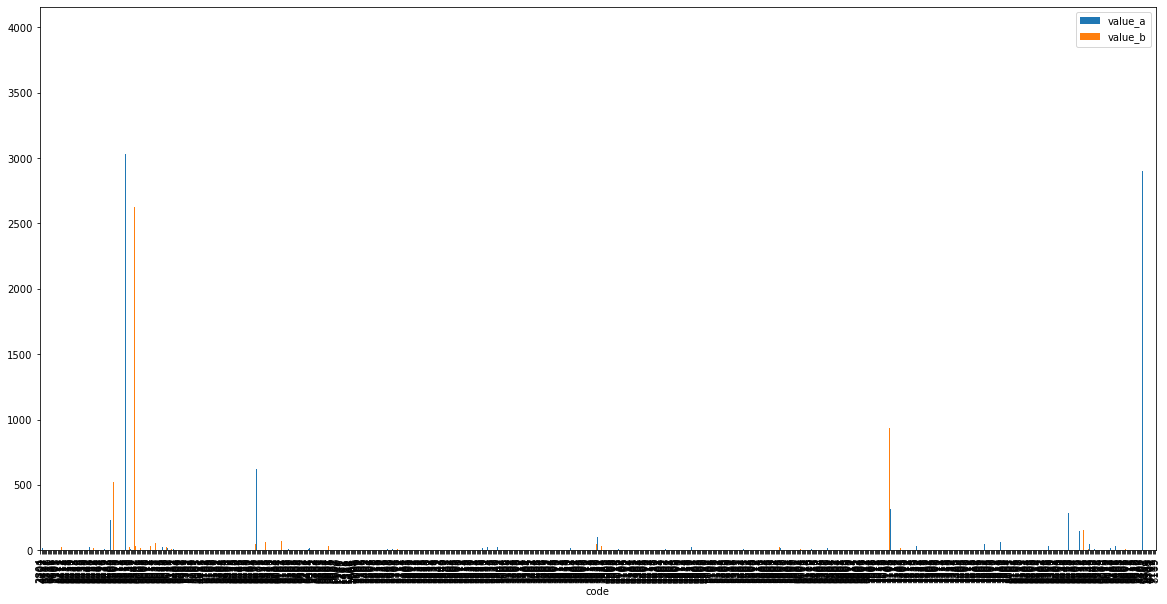

In [6]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

# Export

In [7]:
df.to_csv('import_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregate

In [8]:
print("Total import, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total export, as per partner data:", df['value_b'].sum(), " million USD.")

Total import, as per reporter data: 17385.510000000002  million USD.
Total export, as per partner data: 15494.060000000003  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%. You can change the value to better fit the data.

In [11]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
8517,8517,"Telephone sets, including telephones for cellu...",30415720,No Quantity,3033.24,22058344,No Quantity,3959.90,-926.66,8357376,27.477160,-30.550171,926.66,30.550171
8542,8542,Electronic integrated circuits,3234795,No Quantity,3547.56,1990367,No Quantity,2625.06,922.50,1244428,38.470073,26.003789,922.50,26.003789
7102,7102,"Diamonds, whether or not worked, but not mount...",1464,Weight in carats,2900.11,6319,No Quantity,2306.45,593.66,-4855,-331.625683,20.470258,593.66,20.470258
8529,8529,Transmission apparatus; parts suitable for use...,0,Weight in kilograms,146.55,4754306,Weight in kilograms,460.91,-314.36,-4754306,-inf,-214.506994,314.36,214.506994
8525,8525,Transmission apparatus for radio-broadcasting ...,1136629,Number of items,366.03,147737,Number of items,66.87,299.16,988892,87.002179,81.731006,299.16,81.731006
8471,8471,Automatic data processing machines and units t...,2559961,Number of items,622.14,1270322,Number of items,338.15,283.99,1289639,50.377291,45.647282,283.99,45.647282
8473,8473,Machinery; parts and accessories (other than c...,1686889,Weight in kilograms,282.91,7631254,Weight in kilograms,538.31,-255.40,-5944365,-352.386257,-90.276060,255.40,90.276060
8507,8507,"Electric accumulators, including separators th...",7086402,No Quantity,350.15,7117866,No Quantity,526.17,-176.02,-31464,-0.444005,-50.269884,176.02,50.269884
4702,4702,"Chemical wood pulp, dissolving grades",142837350,Weight in kilograms,124.40,0,Weight in kilograms,0.00,124.40,142837350,100.000000,100.000000,124.40,100.000000
7106,7106,Silver (including silver plated with gold or p...,1663246,Weight in kilograms,817.47,1900460,Weight in kilograms,932.07,-114.60,-237214,-14.262112,-14.018863,114.60,14.018863


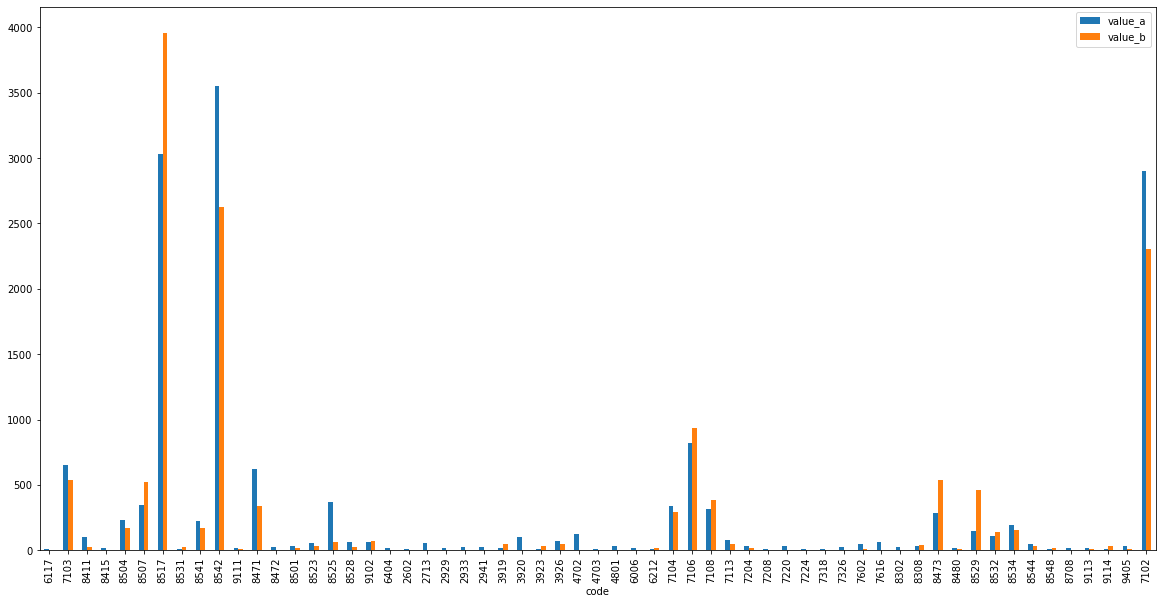

In [12]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()